In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') #ggplot object

In [3]:
# load your multi-class classification dataset
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

input_names = iris['feature_names']
print(input_names)


target_names = iris.get('target_names')
target_names = iris['target_names']
print(target_names)
for name in enumerate(target_names):
  print(name)

print(x.shape)
print(y.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(0, 'setosa')
(1, 'versicolor')
(2, 'virginica')
(150, 4)
(150,)


0 setosa
1 versicolor
2 virginica


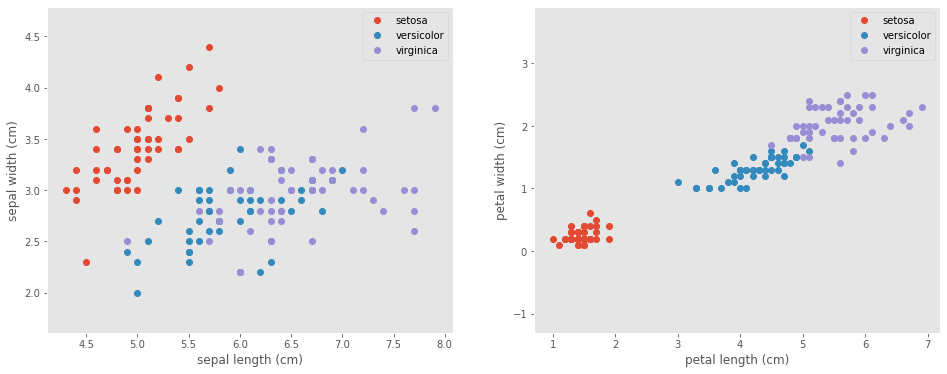

In [5]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(target_names):
    print(target, target_name)
    X_plot = x[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(input_names[0])
plt.ylabel(input_names[1])
plt.axis('equal')
plt.grid()
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(target_names):
    X_plot = x[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(input_names[2])
plt.ylabel(input_names[3])
plt.axis('equal')
plt.grid()
plt.legend();

Currently the range of the datapoints are scattered. Want to normalize and get every datapoint between 0 and 1

$ x_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min}} $

In [3]:
# build my first model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# one hot encloding 
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
print(y[0,:])
print(y[50,:])
print(y[100,:])
print(y.shape)

# define min max scaler to scale your data from 0 to 1
scaler = MinMaxScaler()
# transform data
x_scaled = scaler.fit_transform(x)
print(x_scaled)

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_scaled)
print(x_scaled)

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.5, random_state=2)

n_features = x.shape[1]
n_classes = y.shape[1]
print(n_features, n_classes)

ModuleNotFoundError: No module named 'tensorflow'

# Workflow when creating model
1. Work with data
    - Gather
    - Visualize
    - Normalize
2. Split data
    - Deside how your want to split data
3. Create model based on data

# Perceptron

net is the decission line. Everything above the line is classified as one thing, and everything 
belove is classified as another thing.

$ net = w^rx + b $  
$ x = [x_1, x_2, ..., x_n] $  
$ w = [w_1, w_2, ..., w_n] $

- w: rotates the line
- b: offset the line

_think to dimension y = ax + b, x is stigningstall, b is skjæringspunkt. More or less the same_

## Implementation of perceptron

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
class Perceptron(object):

  def __init__(self, no_of_inputs, epochs=100, learning_rate=0.01):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        self.training_error = []
  
  def predict(self, inputs):
    net = np.dot(inputs, self.weights[1:])+self.weights[0] 
    # step activation function
    if net >= 0:
      activation = 1
    else:
      activation = -1
    return activation

  def train(self, training_inputs, training_labels):
    for _ in range(self.epochs):
      error = 0
      for inputs, label in zip(training_inputs, training_labels):
        prediction = self.predict(inputs)
        self.weights[1:] += self.learning_rate * (label - prediction) * inputs
        self.weights[0] += self.learning_rate * (label - prediction)
        error += label - prediction
      self.training_error.append(error.mean())  

In [6]:
# test perceptron with IRIS data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


In [7]:
# extract first 100 class labels (50 iris-setosa and 50 iris-versicolor)
# Attribute Information: sepal length, sepal width, petal length, petal width in cm and class (Iris Setosa, Iris Versicolour, and Iris Virginica)
x = df.iloc[0:100, [0, 2]].values
y = df.iloc[0:100,4].values
y =np.where(y=='Iris-setosa',1, -1)
print(y)
print(x.ndim)
print(x.shape)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
2
(100, 2)


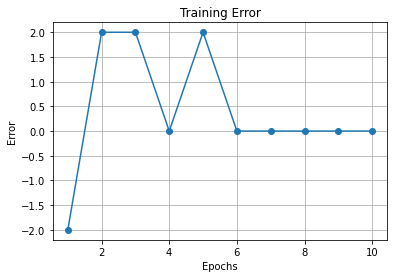

[ 0.4   0.7  -1.84]


In [8]:
# use a peceptron to find a decsion boundary to separate the two classe
p = Perceptron(no_of_inputs=2, epochs=10, learning_rate=0.1)
p.train(x, y)

plt.plot(range(1,len(p.training_error)+1), p.training_error, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Error')
plt.grid()
plt.show()

print(p.weights)    #w[0]=bias w[1:]=weights
pred = []
for t in x:
  pred.append(p.predict(t))

In [9]:
# plot decicion line
x1_min, x1_max = x[:,0].min()-1, x[:,0].max()+1
xx1 = np.arange(x1_min, x1_max, 0.1)
xx2 = -p.weights[1]/p.weights[2] * xx1 - p.weights[0]/p.weights[2]

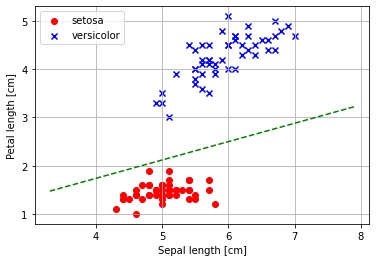

In [10]:
# scatter plot
plt.scatter(x[0:50,0], x[0:50,1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100,0], x[50:100,1], color='blue', marker='x', label='versicolor')
plt.plot(xx1, xx2, 'g--')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [11]:
#print(pred==1)
print(pred)
error = sum(y - pred)/len(y)*100
print('Error = %2.2f %%'  %error)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Error = 0.00 %
